# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [6]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())
print('Male Height mean:', male_df.Weight.mean())
print('Male Height sd:', male_df.Weight.std())

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:', female_df.Height.std())
print('Female Height mean:', female_df.Weight.mean())
print('Female Height sd:', female_df.Weight.std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Height mean: 187.0206206581932
Male Height sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Height mean: 135.86009300746835
Female Height sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

(array([0.00177764, 0.00826081, 0.03272954, 0.08919584, 0.13865614,
        0.1323821 , 0.0819807 , 0.03042906, 0.00679687, 0.0006274 ]),
 array([54.26313333, 56.17577858, 58.08842383, 60.00106909, 61.91371434,
        63.8263596 , 65.73900485, 67.6516501 , 69.56429536, 71.47694061,
        73.38958587]),
 <BarContainer object of 10 artists>)

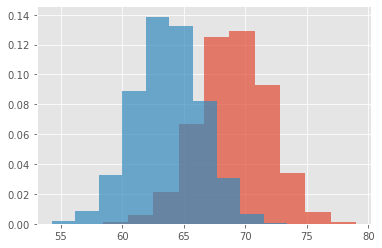

In [11]:
# Your code here

plt.hist(male_df['Height'], bins=10, density=True, alpha = .7)
plt.hist(female_df['Height'], bins=10, density=True, alpha = .7)

In [12]:
# Record your observations - are these inline with your personal observations?
# Women are about 8 inches shorter than men on average, but the distribution of heights for men and women is the same.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

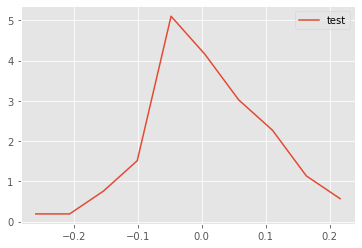

In [46]:
def density(x):
    
    n, bins = np.histogram(x, density=True)
    #print(n , bins)

    x = []
    for i in range(len(bins) - 1):
        x.append((bins[i] + bins[i+1]) / 2)
    
    return x, n
        

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

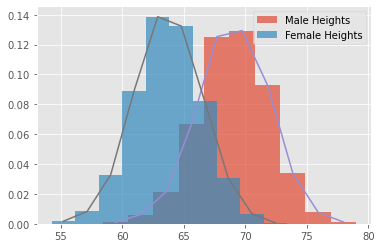

In [51]:
# Your code here 
plt.hist(male_df['Height'], bins=10, density=True, alpha = .7, label='Male Heights')
plt.hist(female_df['Height'], bins=10, density=True, alpha = .7, label="Female Heights")

x, y = density(male_df['Height'])
plt.plot(x, y)
x, y = density(female_df['Height'])
plt.plot(x, y)

plt.legend()

## Repeat the above exercise for male and female weights

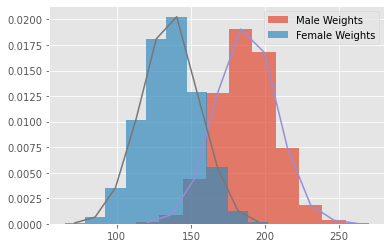

In [52]:
plt.hist(male_df['Weight'], bins=10, density=True, alpha = .7, label='Male Weights')
plt.hist(female_df['Weight'], bins=10, density=True, alpha = .7, label="Female Weights")

x, y = density(male_df['Weight'])
plt.plot(x, y)
x, y = density(female_df['Weight'])
plt.plot(x, y)

plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Women on average weigh less but the distributions of weights for both men and women approximates a normal distribution.

# What is the takeaway when comparing male and female heights and weights?
# Men and women's weights and heights have a simmilar disribution but women are on average smaller than men.

## Repeat the above experiments in seaborn and compare with your results

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Comparing Heights')

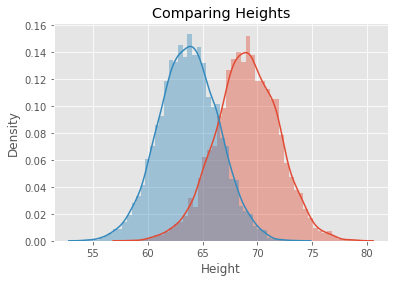

In [62]:
import seaborn as sns

sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])

plt.title('Comparing Heights')

Text(0.5, 1.0, 'Comparing Heights')

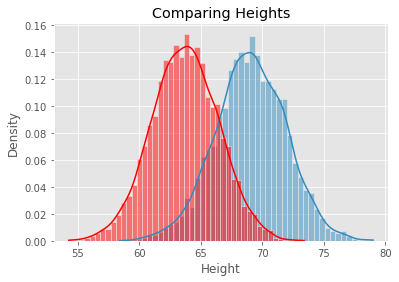

In [72]:
sns.histplot(male_df['Height'], stat='density', kde=True)
sns.histplot(female_df['Height'], stat='density', kde=True, color = 'red')

plt.title('Comparing Heights')

Text(0.5, 1.0, 'Comparing Heights')

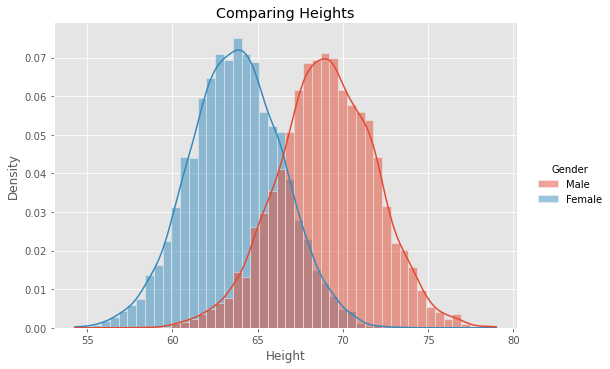

In [84]:
sns.displot(data = data, x = 'Height', stat='density', kde=True, hue='Gender', aspect = 1.5)

plt.title('Comparing Heights')

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Comparing Weights')

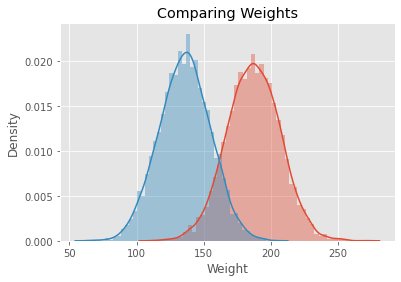

In [65]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])

plt.title('Comparing Weights')

In [88]:
sns.distplot(data, x = 'Weight', hue='Gender')
# sns.distplot(female_df['Weight'])

plt.title('Comparing Weights')

TypeError: distplot() got an unexpected keyword argument 'hue'

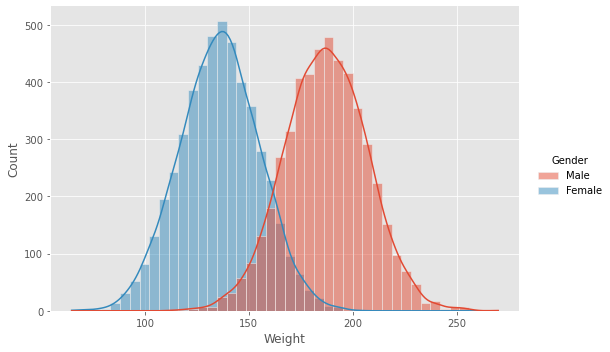

In [85]:
sns.displot(data=data, x='Weight', kde=True, hue='Gender', aspect = 1.5)

# Your comments on the two approaches here. 
Using displot instead of distplot the distribution plot with kde can be created with one like of code.

# are they similar? what makes them different if they are?
There is much less work to do using seaborn.  It takes care of the normalization of the data, comparing different data by class, and creating a nice visual plot.


## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.